In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [9]:
train = pd.read_csv('train.csv')
train.shape

(891, 12)

In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
nas = pd.concat([train.isnull().sum()],axis=1,keys =['Train'])
nas[nas.sum(axis=1)>0]

,Train
Age,177
Cabin,687
Embarked,2


In [15]:
#Cleaning the data
train['Age']=train['Age'].fillna(train['Age'].mean())

In [17]:
train['Embarked']=train['Embarked'].fillna(train['Embarked'].mode()[0])

In [19]:
train['Cabin']=train['Cabin'].fillna(train['Cabin'].mode()[0])

In [21]:
train['Pclass']=train['Pclass'].apply(str)

In [25]:
#getting dummies
for col in train.dtypes[train.dtypes == 'object'].index:
    for_dummy = train.pop(col)
    train = pd.concat([train,pd.get_dummies(for_dummy,prefix=col)],axis=1)

train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,"Name_Abbing, Mr. Anthony",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,38.0,1,0,71.2833,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,3,1,26.0,0,0,7.9250,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,4,1,35.0,1,0,53.1000,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0,35.0,0,0,8.0500,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [27]:
labels = train.pop('Survived')


In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, labels, test_size = 0.25)

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [35]:
y_pred = rf.predict(x_test)

In [37]:
from sklearn.metrics import roc_curve,auc
false_positive_rate, true_positive_rate,thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate,true_positive_rate)
roc_auc

0.7793764988009592

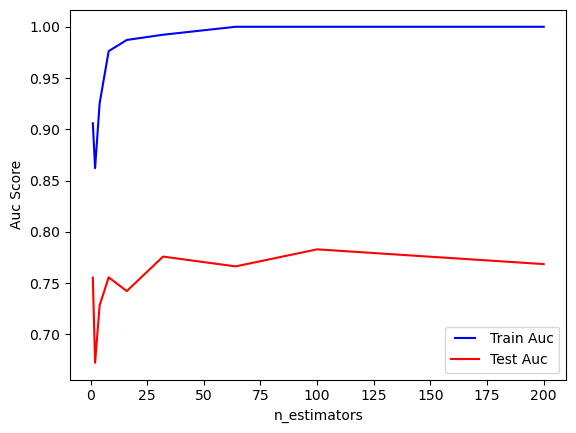

In [49]:
n_estimators = [1,2,4,8,16,32,64,100,200]
test_results = []
train_results = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators = estimator,n_jobs=-1)
    rf.fit(x_train,y_train)
    train_pred = rf.predict(x_train)
    false_positive_rate, true_positive_rate,thresholds = roc_curve(y_train,train_pred)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(x_test)
    false_positive_rate, true_positive_rate,thresholds = roc_curve(y_test,y_pred)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators,train_results,'b',label='Train Auc')
line2, = plt.plot(n_estimators,test_results,'r',label='Test Auc')
plt.legend(handler_map={line1: HandlerLine2D(numpoints = 2)})
plt.ylabel('Auc Score')
plt.xlabel('n_estimators')
plt.show()